Load modules/packages.

In [1]:
import pygam
import pandas
import numpy
import numpy.random
import seaborn
import matplotlib.pyplot 
import vtreat
import vtreat.util
import wvpy.util

Generate example data.

In [2]:
d = pandas.DataFrame({'x':[0.1*i for i in range(200)]})
d['y'] = numpy.sin(d['x']) + 0.1*numpy.random.normal(size=d.shape[0])
d['xc'] = ['level_' + str(5*numpy.round(yi/5, 1)) for yi in d['y']]
d['yc']= d['y']>0.5
d.head()

,x,y,xc,yc
0,0.0,-0.067146,level_-0.0,False
1,0.1,0.077737,level_0.0,False
2,0.2,0.212240,level_0.0,False
3,0.3,0.381226,level_0.5,False
4,0.4,0.176271,level_0.0,False


In [3]:
numpy.mean(d['yc']==True)

0.35

Build a classification model.

In [4]:
transform = vtreat.BinomialOutcomeTreatment(
    outcome_name='yc', 
    outcome_target=True,
    cols_to_copy=['y'])

In [5]:
d_prepared = transform.fit_transform(d, d['yc'])
d_prepared.head()

,y,yc,x,xc_logit_code,xc_prevalence_code,xc_lev_level_0.5,xc_lev_level_1.0,xc_lev_level_-1.0,xc_lev_level_-0.5,xc_lev_level_0.0
0,-0.067146,False,0.0,-5.750218,0.065,0,0,0,0,0
1,0.077737,False,0.1,-5.716612,0.095,0,0,0,0,1
2,0.212240,False,0.2,-5.711329,0.095,0,0,0,0,1
3,0.381226,False,0.3,0.471503,0.215,1,0,0,0,0
4,0.176271,False,0.4,-5.716612,0.095,0,0,0,0,1


In [6]:
transform.score_frame_

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,recommended
0,x,x,clean_copy,False,True,-0.112029,1.142501e-01,1.0,True
1,xc_logit_code,xc,logit_code,True,True,0.842078,5.473033e-55,1.0,True
2,xc_prevalence_code,xc,prevalence_code,False,True,0.502411,3.452165e-14,1.0,True
3,xc_lev_level_0.5,xc,indicator_code,False,True,0.268242,1.228567e-04,5.0,True
4,xc_lev_level_1.0,xc,indicator_code,False,True,0.723747,9.813182e-34,5.0,True
5,xc_lev_level_-1.0,xc,indicator_code,False,True,-0.361158,1.488794e-07,5.0,True
6,xc_lev_level_-0.5,xc,indicator_code,False,True,-0.361158,1.488794e-07,5.0,True
7,xc_lev_level_0.0,xc,indicator_code,False,True,-0.244600,4.818367e-04,5.0,True


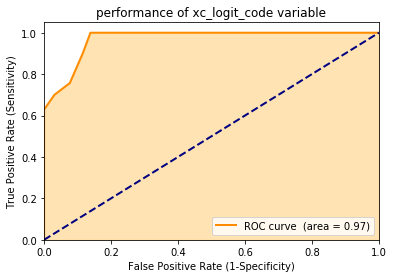

0.9693956043956043

In [7]:
wvpy.util.plot_roc(prediction=d_prepared['xc_logit_code'], 
                   istrue=d_prepared['yc'],
                   title = 'performance of xc_logit_code variable')

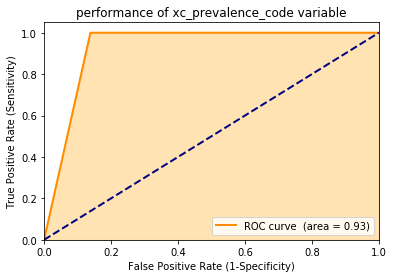

0.9307692307692308

In [8]:
wvpy.util.plot_roc(prediction=d_prepared['xc_prevalence_code'], 
                   istrue=d_prepared['yc'],
                   title = 'performance of xc_prevalence_code variable')